In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge


# 1. Линейная регрессия

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ --- целевая переменная (что мы хотим предсказать), $x_i$ --- признак объекта $х$, $w_i$ --- вес $i$-го признака, $b$ --- bias (смещение, свободный член)

Часто предполагают, что объект $х$ содержит в себе фиктивный признак равный 1 для представления свободного члена $b$. В этом случае формула принимает простой вид:
$$y = \langle w, x \rangle,$$
где $\langle \cdot, \cdot \rangle$ -- скалярное произведение векторов $w, x \in \mathbb{R}^n$.

В матричной форме, в случае, когда у нас есть $m$ объектов формулу можно переписать следующим образом:
$$ Y = Xw, $$ где $Y$ -- столбец размера $n$, $X$ --- матрица признаков размера $n \times k$ (каждая строка матрицы есть описание признаков объекта), $w$ -- вектор весов размера $k$.

**Лосс:** 
$$
\begin{aligned}
L(y_{pred}, Y) &= \frac{1}{n}||y_{pred} - Y||^2_2 =\\
&= \frac{1}{n}||Xw - Y||^2_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 =: L(w)
\end{aligned}
$$

### 1.1 Аналитическое решение

Минимизация ошибки по методу наименьших квадратов дает решение: $$ w = (X^TX)^{-1}X^TY $$

Реализуем класс линейной регрессии с помощью этой формулы.

In [2]:
class MyLinearRegression():
  def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
  def fit(self, X, y):
    n, k = X.shape
    X_train = X

    # add unit value for free coeff "b" ()
    if self.fit_intercept:
      X_train = np.hstack((X, np.ones((n, 1))))

    # method @, *, dot is a matrix multiplication

    self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
    print(self.w)
    #self.w2 = sla.inv(X_train.T * X_train) * X_train * y
    #print(w2)
    self.w3 = (np.linalg.inv(X_train.T.dot(X_train))).dot(X_train.T).dot(y)
    print(self.w3)
    return self

  def predict(self, X):
      # Принимает на вход X и возвращает ответы модели
      # Не забудьте про фиктивный признак равный 1
      n, k = X.shape
      if self.fit_intercept:
        X_train = np.hstack((X, np.ones((n, 1))))

      # multiply X for yours calculated wegth values
      y_pred = X_train @ self.w

      return y_pred
    
  def get_weights(self):
      return self.w
    
    


A@B, A*B, and "A.dot(B)" it's the same procedures

In [3]:
A = np.array([[1, 2, 3],
 [4, 5, 6]])
B = np.matrix('7 8; 9 1; 2 3')
print(A, B)
print(A @ B)
print(A.dot(B))
print(A * B)

[[1 2 3]
 [4 5 6]] [[7 8]
 [9 1]
 [2 3]]
[[31 19]
 [85 55]]
[[31 19]
 [85 55]]
[[31 19]
 [85 55]]


In [4]:
from sklearn.model_selection import train_test_split

# =================================================
# In this section, we generate a training dataset and separate training and testing data
# =================================================

def linear_expression(x):
    return 5 * x + 6

# data set generation:
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y =  linear_expression(X) + np.random.randn(objects_num) * 5

# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

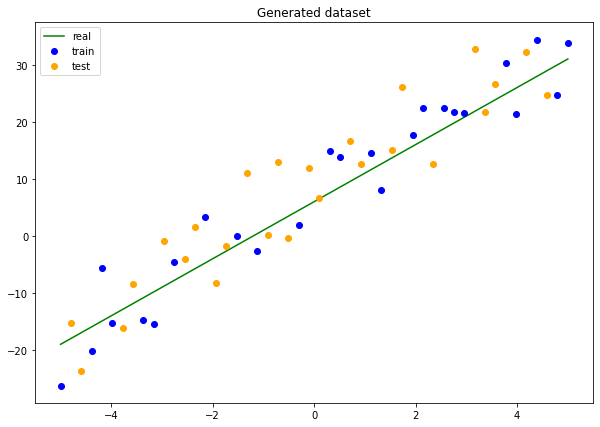

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')
plt.plot(X_train, y_train, "o", label='train', c='b')
plt.plot(X_test, y_test, "o", label='test', c='orange')

plt.title("Generated dataset")
plt.legend()
plt.show()

In [6]:
regressor = MyLinearRegression()

#Мы сгенерировали X в виде рандомной последовательности чисел. 
#Следовательно, его размерность X.shape =  (n,) = (25,). 
#Но необходимо, чтобы вторая размерность была по крайней мере равна 1. 
#Для этого с помощью np.newaxis мы расширяем размерность Х до  (n,k)=(25,1) 

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()


[5.31176062 6.88375838]
[5.31176062 6.88375838]


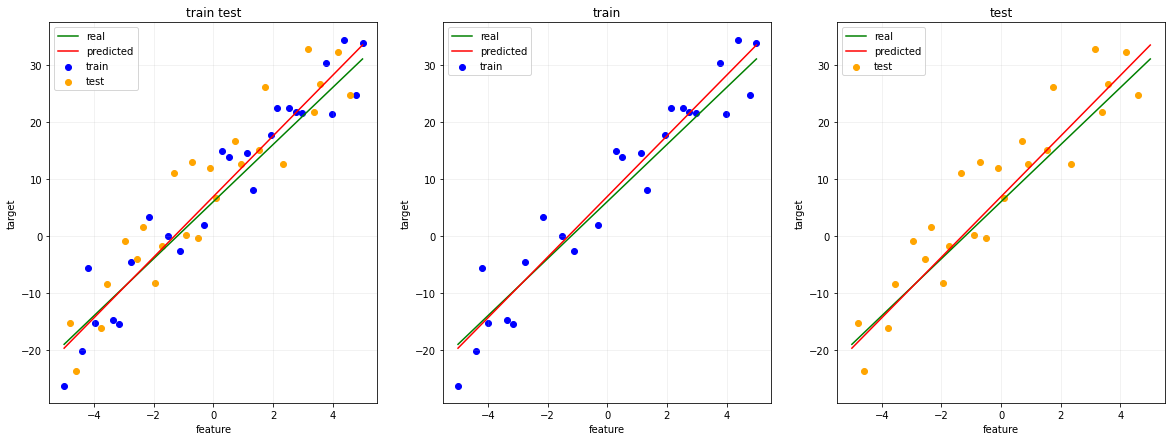

In [7]:
plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

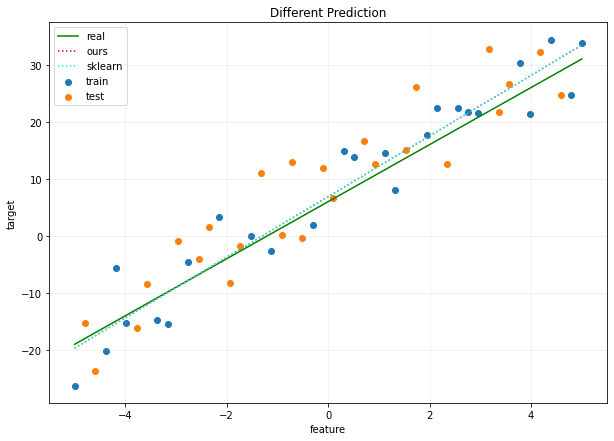

In [8]:
# =======================
# use LinearRegression from sklearn library
# =======================

sk_reg = LinearRegression()
sk_reg.fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='ours', c='r', linestyle=':')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label='sklearn', c='cyan', linestyle=':')

plt.title("Different Prediction")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()



In [9]:
print(sk_reg.coef_)
print(sk_reg.intercept_)
print(regressor.get_weights())

[5.31176062]
6.883758378332854
[5.31176062 6.88375838]


In [10]:
# calculate the mean square error for our LinReg and for Sklearn linReg

from sklearn.metrics import mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  21.79278194728402
Test MSE:  32.9421794373374


### 1.2. Градиентная оптимизация

Обращение матрицы -- очень долгая операция. Кроме того, обратная матрица $(X^TX)^{-1}$ не всегда существует. По этим причинам, мы воспользуемся методом градиентного спуска для оптимизации эмпирического риска.

Градиентый спуск заключается в 
1. расчете $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- градиента ошибки (значение целевой функции, то есть лосса $L(y_{pred}, y_{true})$) от значения параметров модели (весов $w$)
2. шаге спуска -- изменении весов $w$ в сторону антиградиента с некоторым коэффициентом $h$ (он же learning rate):
$$w := w - h\frac{\partial{L}}{\partial{w}}$$
3. Повторении п.1 и п.2 пока не наблюдается сходимость (изменения ошибки малы или отсутсвуют)

Как правило, чаще используют стохастический градиентный спуск (SGD): выбирают случайный элемент обучающей выборки и изменяют коэффициенты модели по направлению антиградиента функции потерь на этом примере.

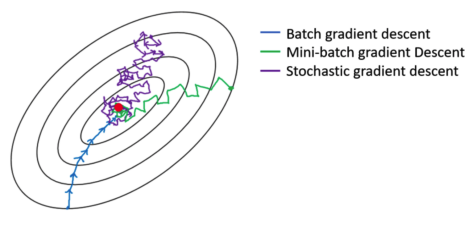

**Цель:** Реализуем новые классы линейной регрессии, в которой оптимизация проводится методами градиентного спуска.

**Предполагаемая зависимость:** $Y = Xw$, где $Y \in \mathbb{R}^{n\times 1}, X \in \mathbb{R}^{n\times m}, w \in \mathbb{R}^{m\times 1}$


**Минимизируемая функция:**
$$
L(y_{pred}, Y) = \frac{1}{n} ||y_{pred} - Y||^2 = \frac{1}{n}||Xw - Y||^2 = \frac{1}{n}(Xw - Y)^T(Xw - Y) = \frac{1}{n}(w^TX^TXw - 2Y^TXw + Y^TY)
$$

**Градиент w.r.t. $w$:**
$$
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}(X^TXw - X^TY) = \frac{2}{n}X^T(y_{pred} - Y) \,\, \in \mathbb{R}^{m \times 1}
$$

In [11]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # lr - learning rate -
        # Не забудьте про фиктивный признак равный 1!

        n, k = X.shape

        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        # plus unit element in train set for fictive parameter 1
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

[433.27729294663396, 307.7209640616053, 226.03885948133876, 172.6440442210726, 137.49731458702144, 114.13223459689432, 98.38326513192605, 87.5666821522559, 79.95308938352164, 74.4277167811451, 70.27165237447734, 67.02095480381313, 64.37592078463484, 62.14265221130449, 60.19542416188266, 58.452448658986704, 56.86026529981479, 55.38368760859251, 53.99932730282353, 52.69142277030904, 51.4491514952359, 50.26489818616561, 49.13313841504996, 48.04971868399203, 47.01139182935427, 46.01551689999425, 45.05986499257656, 44.14249335777468, 43.261663506229624, 42.41578768242799, 41.60339363838715, 40.82310122210258, 40.07360660324175, 39.35367144465536, 38.66211528535448, 37.997810016999075, 37.35967573294249, 36.746677484579784, 36.157822644459536, 35.59215868172721, 35.048771223837115, 34.52678232253271, 34.02534887050338, 33.54366113345113, 33.08094137413274, 32.63644255258988, 32.20944709173307, 31.799265700660456, 31.405236250188814, 31.026722696448477, 30.663114049301857, 30.313823382952805,

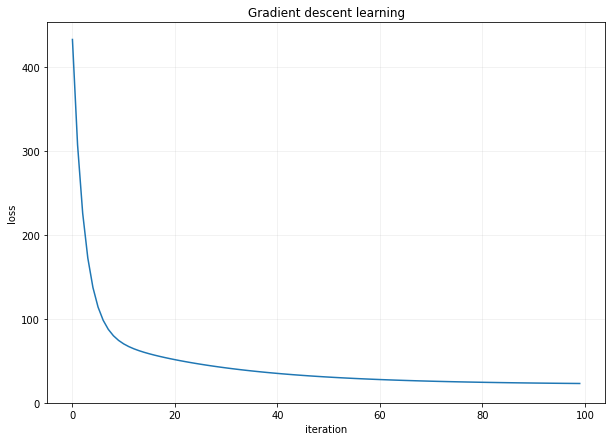

[5.33942368 5.79008525]


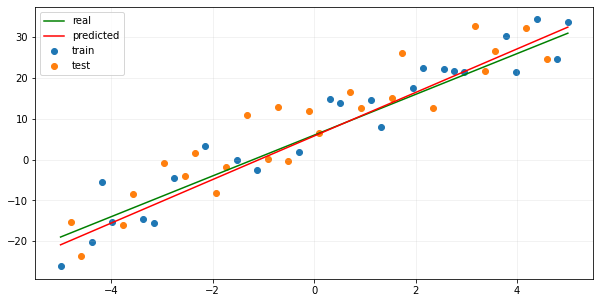

In [12]:
regressor = MyGradientLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()
print(l)
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
print(w)
plt.figure(figsize=(10, 5))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [13]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient(self, X, y, y_pred):
        # Главное отличие в SGD - это использование подвыборки для шага оптимизации
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)

        return grad

[247.96452724717835, 200.73873916156234, 161.6823771526357, 128.70199571073707, 103.02283409118496, 88.45277920338141, 73.27008666543485, 65.71480692084018, 58.38625618291523, 54.2632099458855, 52.86103643247883, 51.6201768967698, 51.014769294002306, 50.130117960448025, 48.81264551481198, 47.24187124601905, 46.13648097109893, 45.07480206963155, 44.765637159832465, 43.88007557339427, 42.50505863322581, 42.187942418521445, 41.45986154802903, 41.28104676939983, 40.83572386663318, 38.98896264873723, 38.53221204544524, 38.09822729557147, 37.579095190362075, 37.66594596428158, 36.94322302668116, 36.21253944553246, 35.97683037433523, 35.36733793652356, 34.648082991694615, 33.75598113745107, 33.04130681791402, 32.6509149470426, 32.235845741346914, 31.634029463828483, 31.28007746464025, 31.07197327769222, 31.008006730927573, 30.94582360050031, 30.868731485297168, 30.03000548268579, 29.856284630108092, 29.892232441122292, 29.366319079184528, 29.90290342330096, 29.523945753850192, 28.961985925112

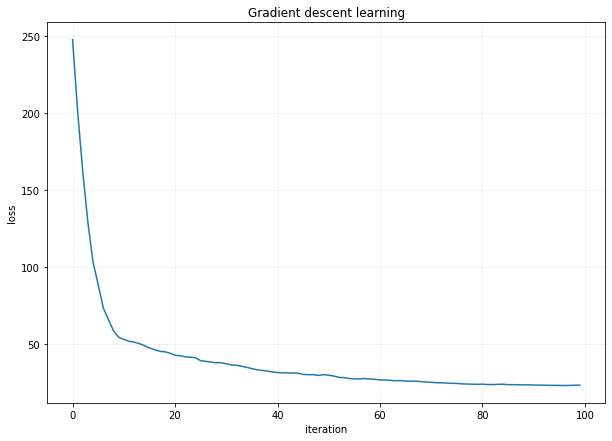

[5.2265116  5.94250588]


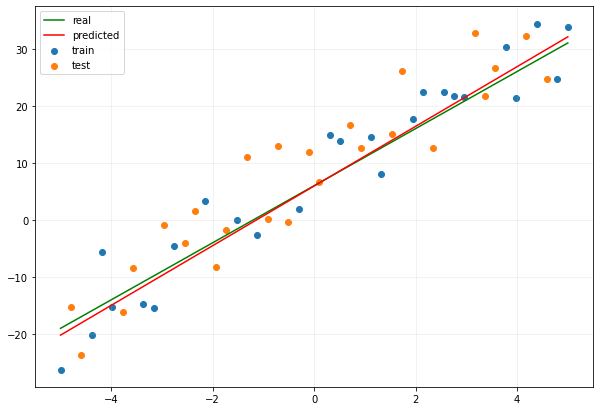

In [14]:
regressor = MySGDLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()
print(l)
plt.figure(figsize=(10, 7))
plt.plot(l)
plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()


predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
print(w)
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

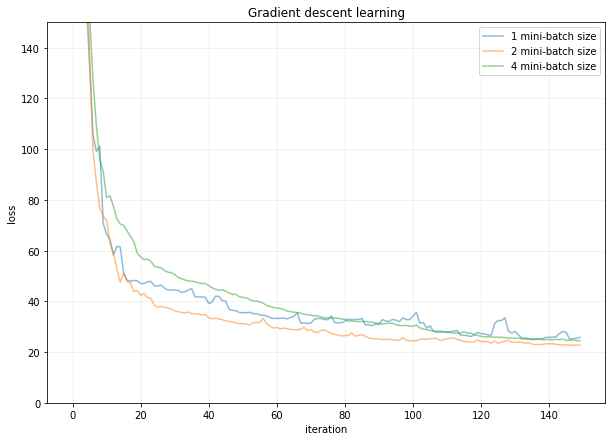

In [15]:
n_samples = [1, 2, 4]
plt.figure(figsize=(10, 7))

for ns in n_samples:
    l = MySGDLinearRegression(fit_intercept=True, n_sample=ns).fit(
        X_train[:, np.newaxis],
        y_train,
        lr=5e-3,
        max_iter=150,
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()

Как видно по графикам размер подвыборки влияет на стабильность сходимости (чем меньше, тем больше и резче изменения весов).
При этом количество итераций для минимизации примерно одинаково.

SGD также обычно улучшают адаптивным уменьшением величины шага. (подробнее в курсах про методы оптимизаций итп)


# 2. Логистическая регрессия

Задание аналогичное линейной регрессии, только мы переводим выходной значение в вероятность предсказания класса 


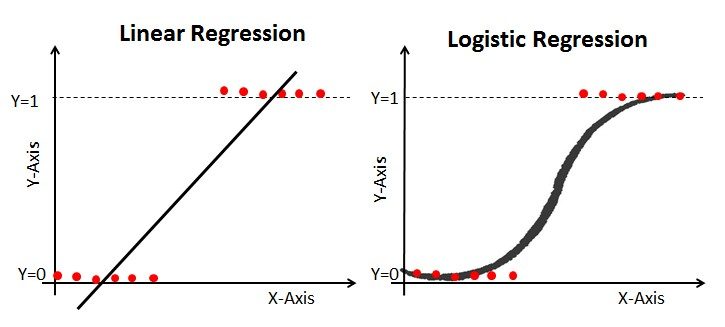



Для этого воспользуемся функцией: $\displaystyle\sigma(x) = \frac{1}{1 + e^{-x}}$

Задача теперь формулируется так:

**Предсказания:** $$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

**Лосс (LogLoss):** $$
L(w) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

**Градиент:**
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = -y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

In [16]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyLogisticRegression(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, max_iter=100, lr=0.1):
        # Принимает на вход X, y и вычисляет веса по данной выборке.
        # Множество допустимых классов: {1, -1}
        # Не забудьте про фиктивный признак равный 1!
        
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []
        
        for iter_num in range(max_iter):
            z = sigmoid(logit(X_train, self.w))
            grad = np.dot(X_train.T, (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))
        
        return losses
        
    def predict_proba(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

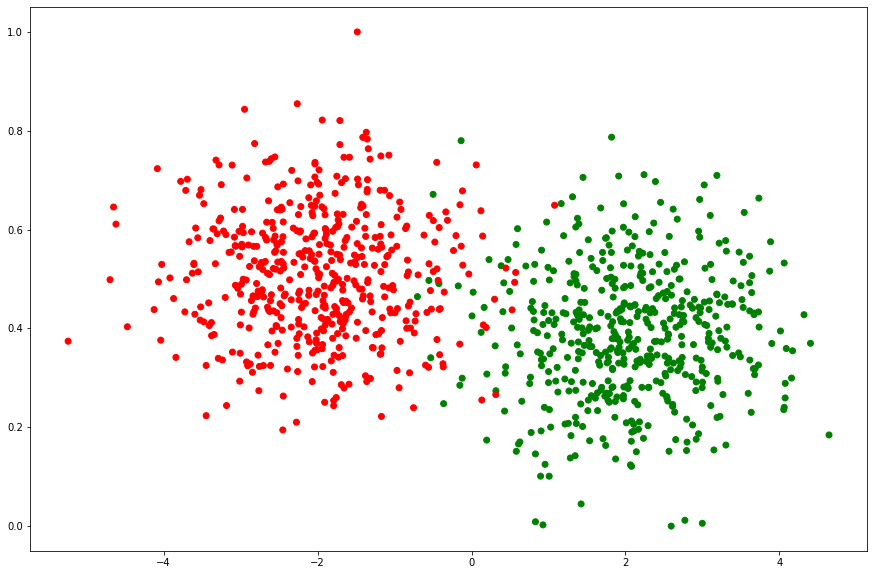

[1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1
 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], (X[:, 1] -min(X[:, 1]))/(max(X[:, 1])-min(X[:, 1])), c=colored_y)
plt.show()
print(y)

In [22]:
clf = MyLogisticRegression()

clf.fit(X, y, max_iter=1000)

w = clf.get_weights()
print(w)

[-0.11476186  3.06125615 -0.62735461]


[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


(-8.0, 8.0)

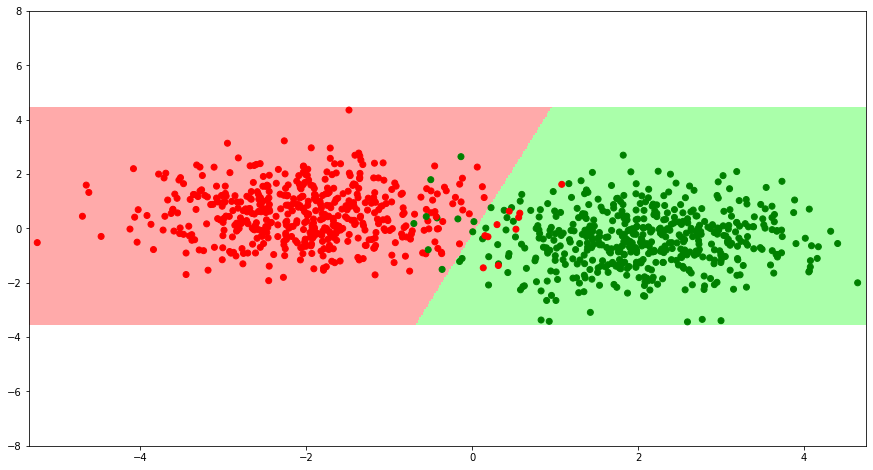

In [27]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
print(Z)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.ylim([-8, 8])

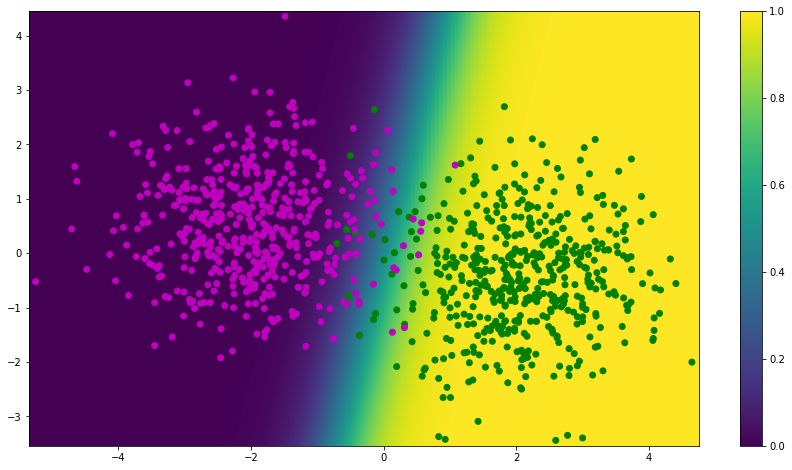

In [29]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])


plt.figure(figsize=(15,8))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()